In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
%config IPCompleter.greedy=True

# Election

## Read DF

In [2]:

train = 'train.csv'

df = pd.read_csv(train)

df.head()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,situacao
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.67,0.0,...,14,14,16583.60,1184.54,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,nao_eleito
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.85,6625.0,...,24,23,20325.99,846.92,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,nao_eleito
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,158120.80,9301.22,2250.0,...,123,108,146011.70,1187.09,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,eleito
3,2006,10002,ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.19,0.0,...,8,8,3001.12,375.14,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,nao_eleito
4,2006,10003,ANSELMO DE JESUS ABREU,RO,PT,48,48,119820.00,2496.25,0.0,...,133,120,116416.64,875.31,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,eleito


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7622 entries, 0 to 7621
Data columns (total 24 columns):
ano                                      7622 non-null int64
sequencial_candidato                     7622 non-null int64
nome                                     7622 non-null object
uf                                       7622 non-null object
partido                                  7622 non-null object
quantidade_doacoes                       7622 non-null int64
quantidade_doadores                      7622 non-null int64
total_receita                            7622 non-null float64
media_receita                            7622 non-null float64
recursos_de_outros_candidatos.comites    7622 non-null float64
recursos_de_pessoas_fisicas              7622 non-null float64
recursos_de_pessoas_juridicas            7622 non-null float64
recursos_proprios                        7622 non-null float64
recursos_de_partido_politico             7622 non-null float64
quantidade_despesas   

### Removing non representative data

In [4]:
df.columns

Index(['ano', 'sequencial_candidato', 'nome', 'uf', 'partido',
       'quantidade_doacoes', 'quantidade_doadores', 'total_receita',
       'media_receita', 'recursos_de_outros_candidatos.comites',
       'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas',
       'recursos_proprios', 'recursos_de_partido_politico',
       'quantidade_despesas', 'quantidade_fornecedores', 'total_despesa',
       'media_despesa', 'cargo', 'sexo', 'grau', 'estado_civil', 'ocupacao',
       'situacao'],
      dtype='object')

In [5]:
df.drop(labels=['partido','ano', 'nome', 'uf', 'ocupacao', 'cargo' ], axis=1, inplace=True)

## Check Missing Values

In [6]:
df.isnull().any()

sequencial_candidato                     False
quantidade_doacoes                       False
quantidade_doadores                      False
total_receita                            False
media_receita                            False
recursos_de_outros_candidatos.comites    False
recursos_de_pessoas_fisicas              False
recursos_de_pessoas_juridicas            False
recursos_proprios                        False
recursos_de_partido_politico             False
quantidade_despesas                      False
quantidade_fornecedores                  False
total_despesa                            False
media_despesa                            False
sexo                                     False
grau                                     False
estado_civil                             False
situacao                                 False
dtype: bool

In [7]:
df.isnull().sum()

sequencial_candidato                     0
quantidade_doacoes                       0
quantidade_doadores                      0
total_receita                            0
media_receita                            0
recursos_de_outros_candidatos.comites    0
recursos_de_pessoas_fisicas              0
recursos_de_pessoas_juridicas            0
recursos_proprios                        0
recursos_de_partido_politico             0
quantidade_despesas                      0
quantidade_fornecedores                  0
total_despesa                            0
media_despesa                            0
sexo                                     0
grau                                     0
estado_civil                             0
situacao                                 0
dtype: int64

## Check Variance

In [8]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

numerics = df[numeric_feats]

numerics.max() - numerics.min()

sequencial_candidato                     2.700000e+11
quantidade_doacoes                       6.996000e+03
quantidade_doadores                      5.799000e+03
total_receita                            5.690642e+06
media_receita                            5.001800e+05
recursos_de_outros_candidatos.comites    3.664205e+06
recursos_de_pessoas_fisicas              1.403049e+06
recursos_de_pessoas_juridicas            3.178226e+06
recursos_proprios                        5.525600e+06
recursos_de_partido_politico             2.745700e+06
quantidade_despesas                      9.931000e+03
quantidade_fornecedores                  8.358000e+03
total_despesa                            4.989491e+06
media_despesa                            5.001770e+05
dtype: float64

- - - 

It seems we have some insane variances, specially with our target variable **votos**, therefore we must check the skewness of these guys


* quantidade_doacoes       
* quantidade_doadores                      
* total_receita                      
* media_receita                      
* quantidade_despesas                 
* quantidade_fornecedores                
* total_despesa                           
* media_despesa                          
* votos                                 

- - -

## Check Skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3e8154898>,
      dtype=object)

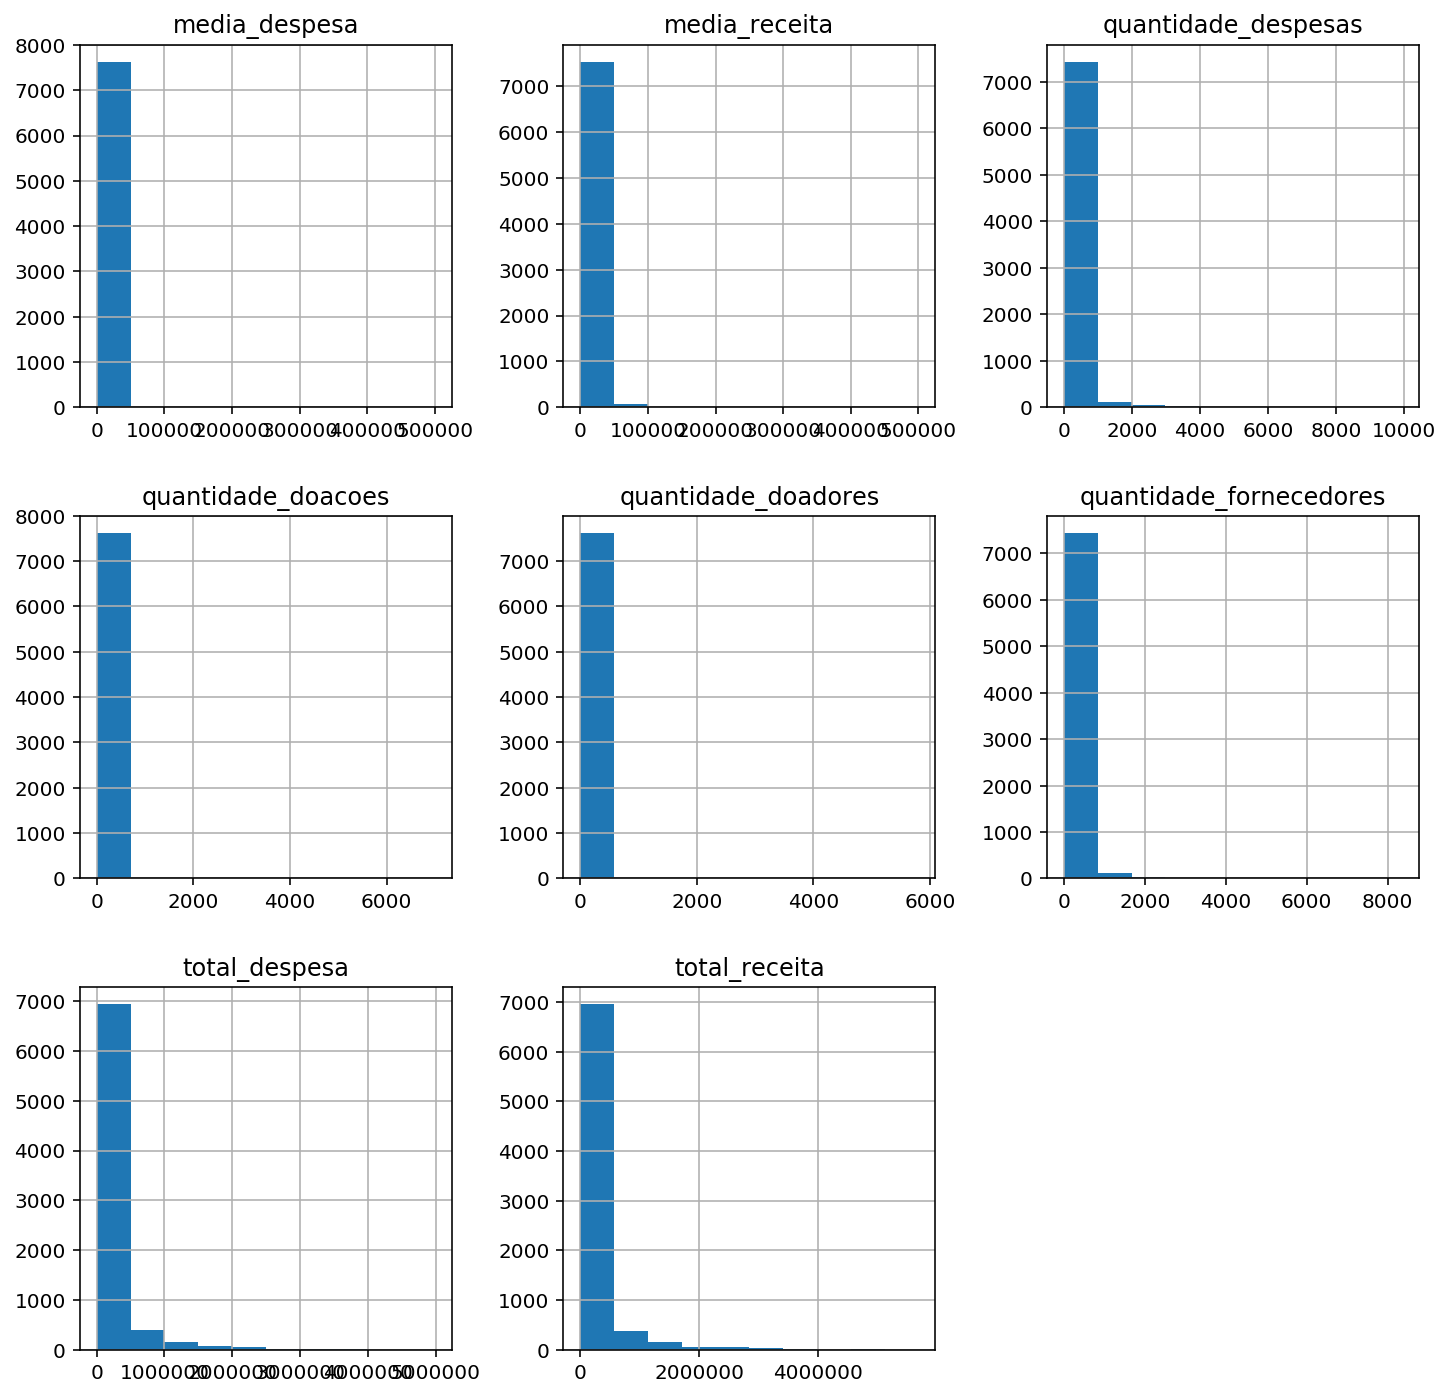

In [9]:
high_var = pd.DataFrame({"total_despesa":df["total_despesa"],
                        "media_despesa":df["media_despesa"], "quantidade_fornecedores":df["quantidade_fornecedores"],
                         "quantidade_despesas":df["quantidade_despesas"],"media_receita":df["media_receita"],
                         "total_receita":df["total_receita"],"quantidade_doadores":df["quantidade_doadores"],
                         "quantidade_doacoes":df["quantidade_doacoes"]})

matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)

high_var.hist()

- - -

All these variables are pretty skewed to the left, figures as most candidates are not elected.

- - -

In [10]:
from scipy.stats import skew


skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats.pop('sequencial_candidato')
print(skewed_feats)

quantidade_doacoes                       40.620418
quantidade_doadores                      38.123029
total_receita                             4.733645
media_receita                            11.942117
recursos_de_outros_candidatos.comites    17.030140
recursos_de_pessoas_fisicas               8.268125
recursos_de_pessoas_juridicas             5.219324
recursos_proprios                        19.326331
recursos_de_partido_politico             10.248697
quantidade_despesas                       8.618904
quantidade_fornecedores                   8.492205
total_despesa                             4.583536
media_despesa                            70.090887
dtype: float64


- - -

All of them have pretty high positive skewness, I will therefore apply **Logarithm transformation** 

[data transformation](https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55) 

[pipeline](https://www.kaggle.com/apapiu/regularized-linear-models)

- - -

In [11]:
df[skewed_feats.index] =  np.log1p(df[skewed_feats.index])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3dbde6198>,
      dtype=object)

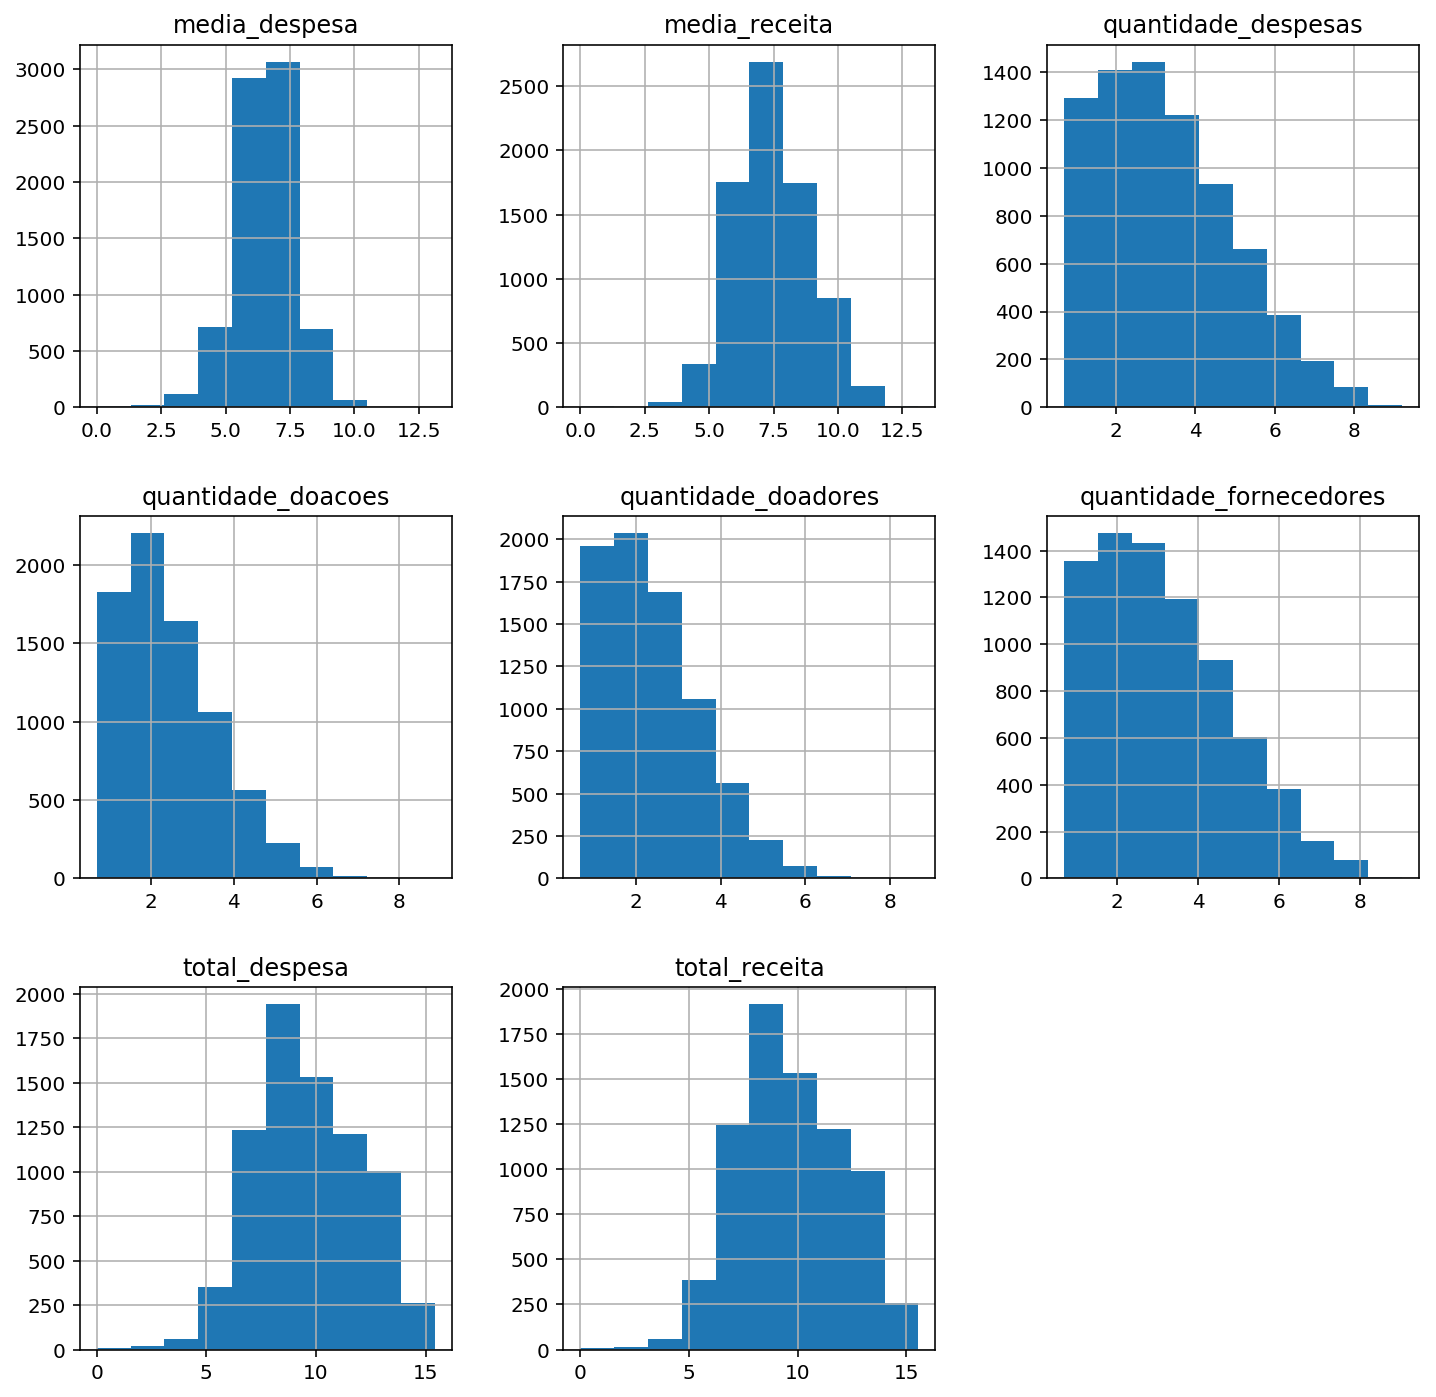

In [12]:
log_transformed = pd.DataFrame({"total_despesa":df["total_despesa"],
                        "media_despesa":df["media_despesa"], "quantidade_fornecedores":df["quantidade_fornecedores"],
                         "quantidade_despesas":df["quantidade_despesas"],"media_receita":df["media_receita"],
                         "total_receita":df["total_receita"],"quantidade_doadores":df["quantidade_doadores"],
                         "quantidade_doacoes":df["quantidade_doacoes"]})

matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)

log_transformed.hist()

/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


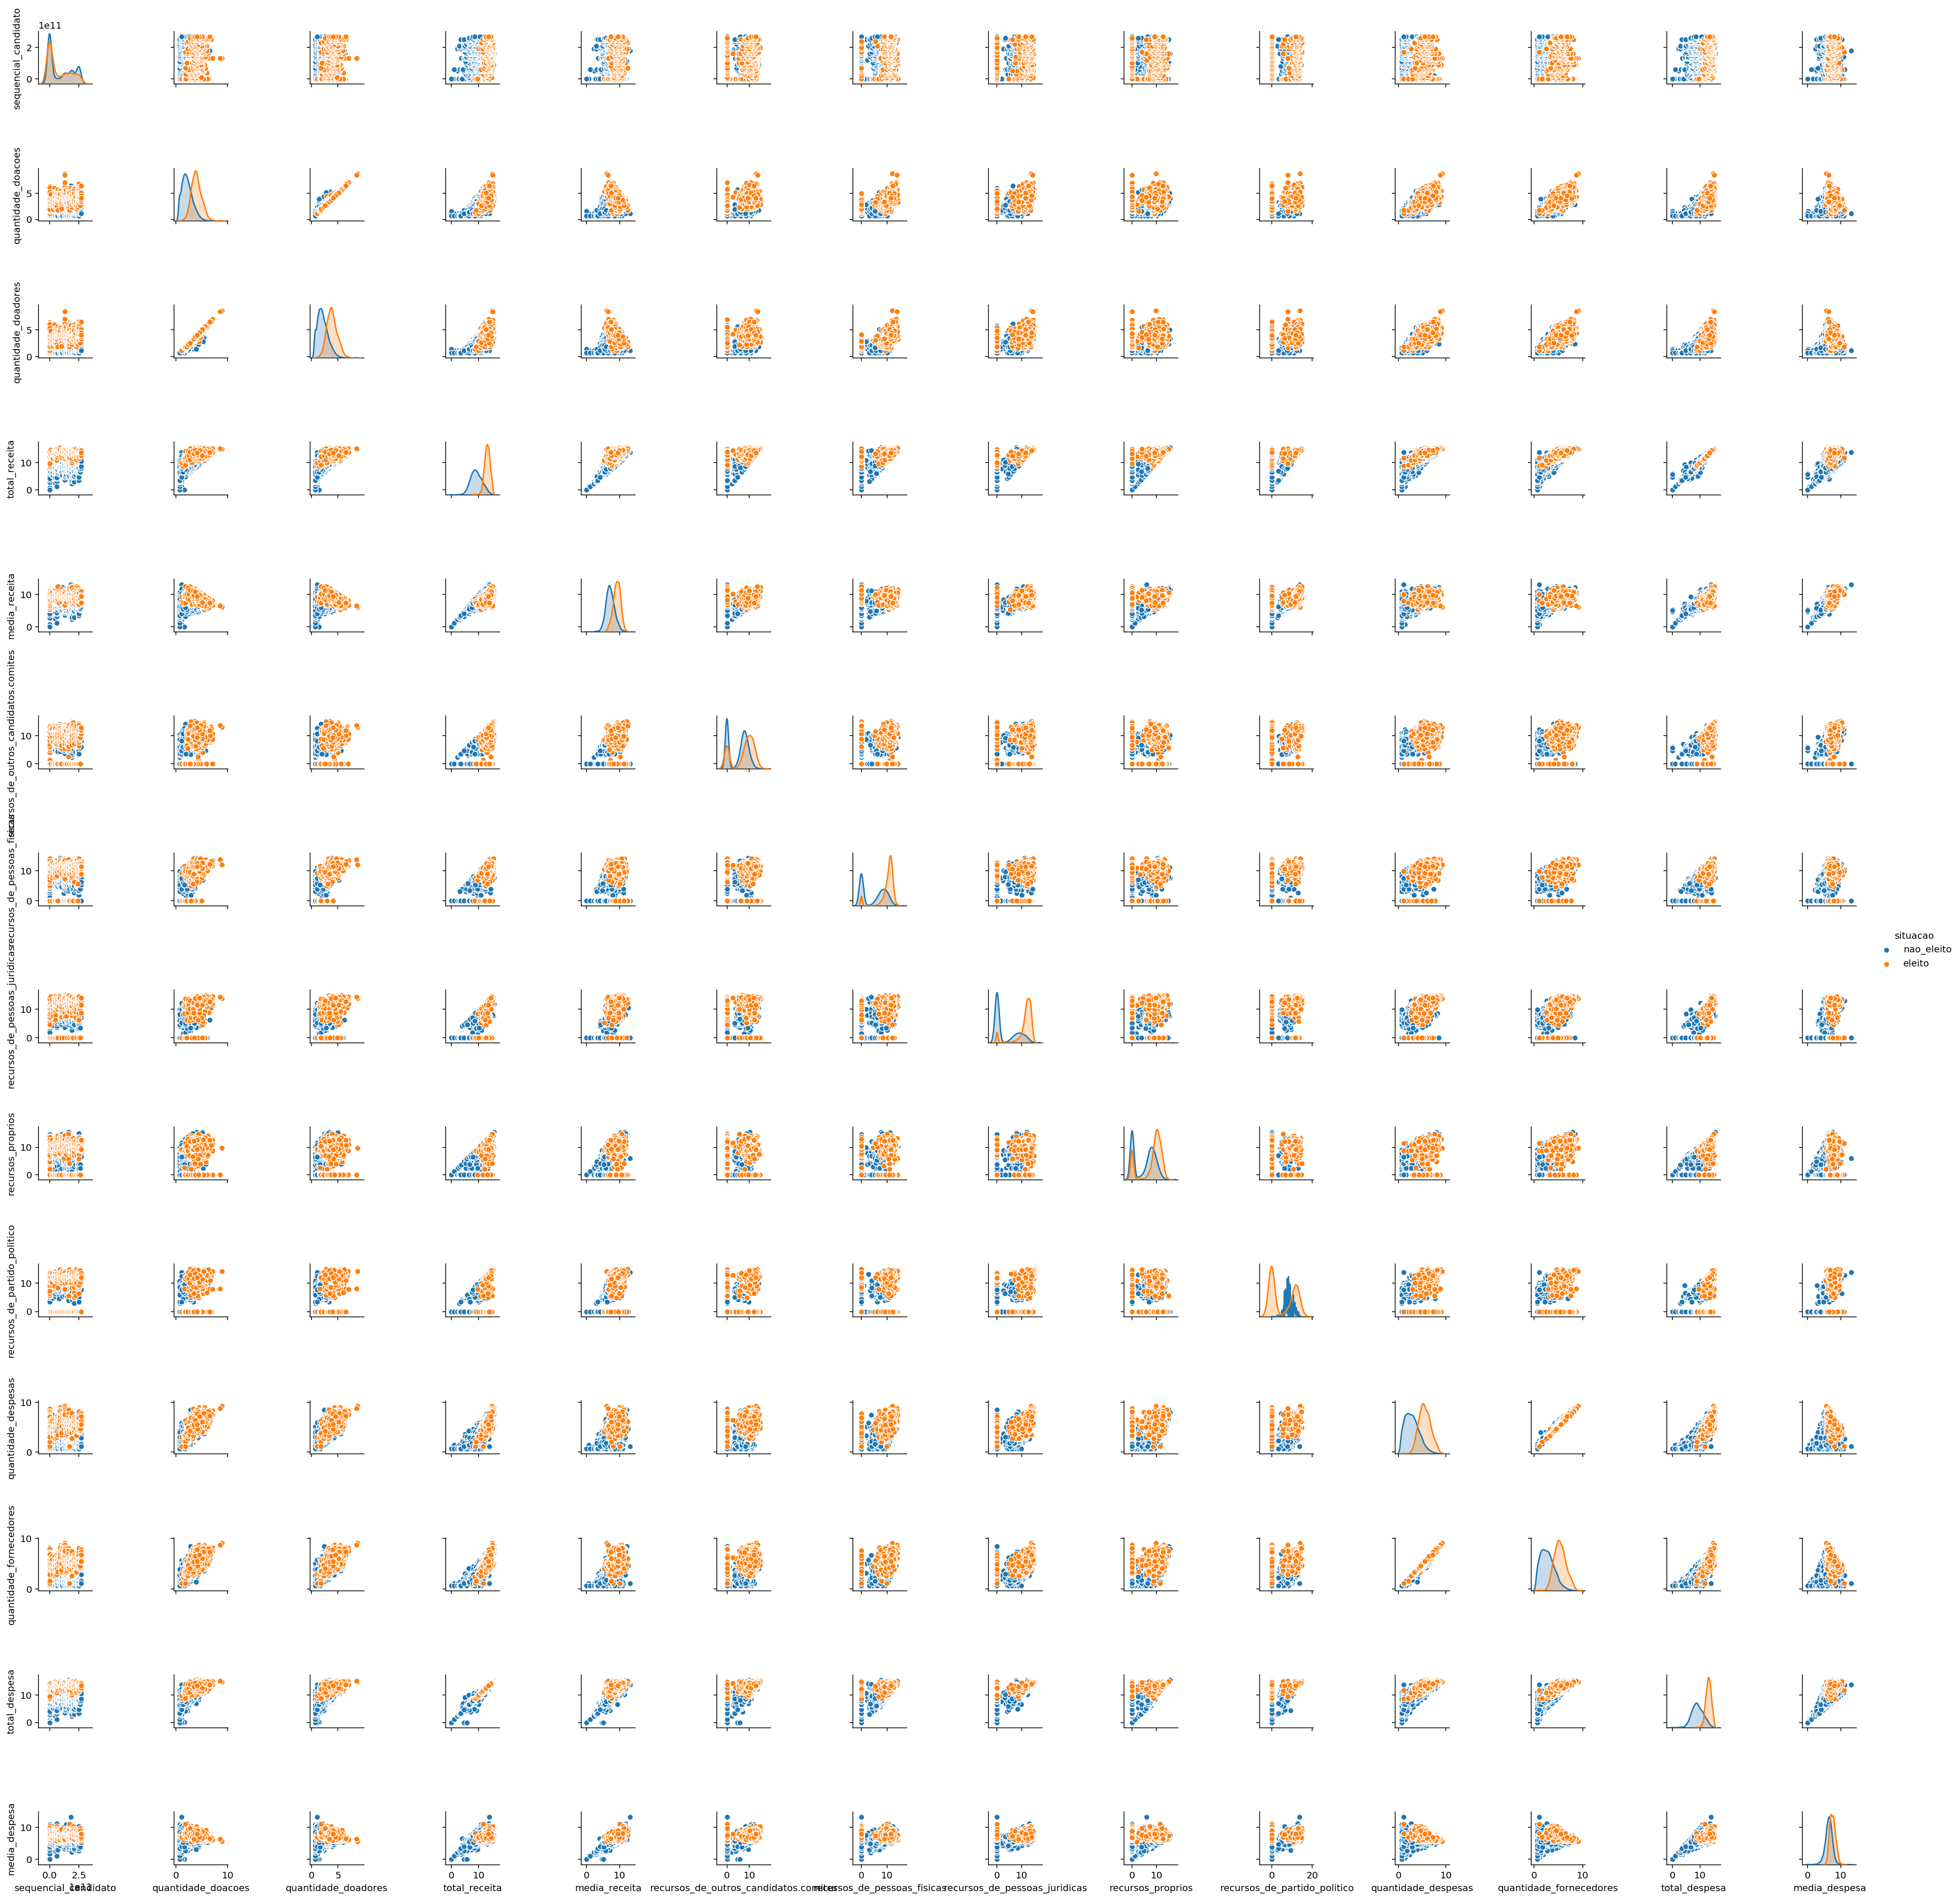

In [13]:
import seaborn as sns
sns.pairplot(df, hue='situacao', size=2)


## One-hot enconding

In [14]:
df = pd.get_dummies(df)


In [15]:
df.columns


Index(['sequencial_candidato', 'quantidade_doacoes', 'quantidade_doadores',
       'total_receita', 'media_receita',
       'recursos_de_outros_candidatos.comites', 'recursos_de_pessoas_fisicas',
       'recursos_de_pessoas_juridicas', 'recursos_proprios',
       'recursos_de_partido_politico', 'quantidade_despesas',
       'quantidade_fornecedores', 'total_despesa', 'media_despesa',
       'sexo_FEMININO', 'sexo_MASCULINO', 'grau_ENSINO FUNDAMENTAL COMPLETO',
       'grau_ENSINO FUNDAMENTAL INCOMPLETO', 'grau_ENSINO MÉDIO COMPLETO',
       'grau_ENSINO MÉDIO INCOMPLETO', 'grau_LÊ E ESCREVE',
       'grau_SUPERIOR COMPLETO', 'grau_SUPERIOR INCOMPLETO',
       'estado_civil_CASADO(A)', 'estado_civil_DIVORCIADO(A)',
       'estado_civil_SEPARADO(A) JUDICIALMENTE', 'estado_civil_SOLTEIRO(A)',
       'estado_civil_VIÚVO(A)', 'situacao_eleito', 'situacao_nao_eleito'],
      dtype='object')

### Remove multicollinearity

In [16]:
df.drop(labels=['grau_SUPERIOR COMPLETO', 'estado_civil_SOLTEIRO(A)', 'sexo_MASCULINO', 'situacao_nao_eleito'], axis=1, inplace=True)

# Repeat for test set

In [17]:
test = 'test.csv'

df2 = pd.read_csv(test)

df2.head()


,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,...,recursos_de_partido_politico,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao
0,2014,10000000135,EMERSON DA SILVA SANTOS,AC,PSOL,3,3,1580.00,526.67,0.00,...,80.0,3,3,1580.00,526.67,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES"
1,2014,10000000142,GERALDO SILVA DOS SANTOS,AC,PSOL,5,5,3180.00,636.00,0.00,...,80.0,6,5,3130.02,521.67,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),VIGILANTE
2,2014,10000000158,CARLOS CESAR CORREIA DE MESSIAS,AC,PSB,40,38,336793.13,8419.83,1923.07,...,0.0,145,139,326869.78,2254.27,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),OUTROS
3,2014,10000000161,IDESIO LUIS FRANKE,AC,PT,29,29,156719.32,5404.11,39122.32,...,25000.0,136,121,241016.07,1772.18,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),AGRÔNOMO
4,2014,10000000163,LEONARDO CUNHA DE BRITO,AC,PT,160,146,737073.00,4606.71,10000.00,...,25000.0,518,354,567401.15,1095.37,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ADVOGADO


In [18]:
df2.drop(labels=['partido','ano', 'nome', 'uf', 'ocupacao', 'cargo' ], axis=1, inplace=True)


In [19]:

numeric_feats = df2.dtypes[df2.dtypes != "object"].index

numerics = df2[numeric_feats]

numerics.max() - numerics.min()

sequencial_candidato                     2.600000e+11
quantidade_doacoes                       6.830000e+02
quantidade_doadores                      4.950000e+02
total_receita                            6.832481e+06
media_receita                            2.812499e+05
recursos_de_outros_candidatos.comites    1.674510e+06
recursos_de_pessoas_fisicas              1.826762e+06
recursos_de_pessoas_juridicas            3.828338e+06
recursos_proprios                        3.343815e+06
recursos_de_partido_politico             5.769682e+06
quantidade_despesas                      6.412000e+03
quantidade_fornecedores                  5.169000e+03
total_despesa                            7.420178e+06
media_despesa                            3.327020e+04
dtype: float64

In [20]:
skewed_feats = df2[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats.pop('sequencial_candidato')
print(skewed_feats)

quantidade_doacoes                        5.638186
quantidade_doadores                       5.235919
total_receita                             4.822281
media_receita                             6.475469
recursos_de_outros_candidatos.comites    10.341209
recursos_de_pessoas_fisicas               8.019462
recursos_de_pessoas_juridicas             7.003015
recursos_proprios                        14.699117
recursos_de_partido_politico              7.322686
quantidade_despesas                       6.650709
quantidade_fornecedores                   6.988518
total_despesa                             5.031525
media_despesa                             7.546112
dtype: float64


In [21]:
df2[skewed_feats.index] =  np.log1p(df2[skewed_feats.index])


In [22]:
df2 = pd.get_dummies(df2)
df2.columns
df2.drop(labels=['grau_SUPERIOR COMPLETO', 'estado_civil_SOLTEIRO(A)', 'sexo_MASCULINO'], axis=1, inplace=True)


In [23]:
set(df2.columns.tolist()) - set(df.columns.tolist())

set()

In [24]:
set(df.columns.tolist()) - set(df2.columns.tolist())

{'situacao_eleito'}

## Train/Test Split

In [25]:
from sklearn.model_selection import train_test_split


data = df.copy()
target = data.pop('situacao_eleito')

X_train, X_test, y_train, y_test = train_test_split(data, target, shuffle=True,
                                                    test_size=0.3, random_state=49)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5335, 25)
(2287, 25)
(5335,)
(2287,)


In [26]:
from collections import Counter

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler #conda install -c conda-forge imbalanced-learn

print('Original dataset shape %s' % Counter(df['situacao_eleito']))

Original dataset shape Counter({0: 6596, 1: 1026})


## Há desbalanceamento das classes (isto é, uma classe tem muito mais instâncias que outra)? Em que proporção? Quais efeitos colaterais o desbalanceamento de classes pode causar no classificador? Como você poderia tratar isso? (1 pt.)

Há um certo desbalanceamento (86.5% / 13.5 %). Isso pode causar um enviesamento no modelo, um exemplp grosseiro seria: O modelo sempre 'chutar' 0 e assim conseguir acurácia próximo de 86%. Há várias formas de lidar com isso, a primeira é não usar acurácia como métrica, assim usarei (como recomendado) Precision, Recall e AUC. Além disso usarei uma técnica conhecida de resampling sintético, o SMOTE (Synthetic Minority Over-sampling Technique) visto que tenho poucos dados. Finalmente aplicarei diversos algoritmos e uma análise inicial pode me ajudar a perceber quais tendem a sofre overfitting.

In [27]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=49)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
print('Resampled dataset shape %s' % Counter(y_train_res))


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 707
Before OverSampling, counts of label '0': 4628 

Resampled dataset shape Counter({0: 4628, 1: 4628})
After OverSampling, the shape of train_X: (9256, 25)
After OverSampling, the shape of train_y: (9256,) 

After OverSampling, counts of label '1': 4628
After OverSampling, counts of label '0': 4628


In [28]:
features = data.columns.tolist()
features.pop(0)

'sequencial_candidato'

## Fit Model on Training Data

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectFromModel



clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

pipeline = Pipeline([
#    ('feature_selection', SelectFromModel(LinearSVC(max_iter=100000))),
    ('clf', RandomForestClassifier()) #step1 - classifier
])
#pipeline.fit(X_train,y_train)

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train[features], y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucascavalcante/anaconda3/lib/p

---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
-----------------------------------
fit_time  mean  0.026937325795491535
fit_time  std  0.0026823196906344106
score_time  mean  0.0008940696716308594
score_time  std  2.238935378985242e-05
test_score  mean  0.9105914697713976
test_score  std  0.001954958659966835
train_score  mean  0.9146198630736082
train_score  std  0.0028224330822762583


/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


---------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
-----------------------------------
fit_time  mean  0.19017370541890463
fit_time  std  0.02247270812268809
score_time  mean  0.0679932435353597
score_time  std  0.00030384757749144035
test_score  mean  0.9092779735316325
test_score  std  0.0013498772437322932
train_score  mean  0.9394565034345411
train_score  std  0.0008632576800855486


/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


---------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
-----------------------------------
fit_time  mean  0.0034716924031575522
fit_time  std  0.00026193051345282665
score_time  mean  0.040634711583455406
score_time  std  0.0015159998704998665
test_score  mean  0.8999039314101269
test_score  std  0.004481775683486933
train_score  mean  0.944985217910156
train_score  std  0.003798899216852812
---------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
-----------------------------------
fit_time  mean  0.01829067866007487
fi

/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in 

---------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
-----------------------------------
fit_time  mean  0.2742586135864258
fit_time  std  0.003191689532907867
score_time  mean  0.0020827452341715493
score_time  std  0.00012793052101756018
test_score  mean  0.9154635422811982
test_score  std  0.003066077823415917
train_score  mean  0.9598876025825609
train_score  std  0.0023101600547888886


## Treine: um modelo de regressão logística, KNN, uma árvore de decisão e um modelo de adaboost. Tune esses modelos usando validação cruzada e controle overfitting se necessário, considerando as particularidades de cada modelo.  (2 pts.)

## Reporte Precision, Recall e AUC-Precision&Recall no treino e validação. Há uma grande diferença de desempenho no treino/validação? Como você avalia os resultados? 

## Interprete as saídas dos modelos. Quais atributos parecem ser mais importantes de acordo com cada modelo? 

Para cada um desses modelos farei primeiro uso do GridSearchCV para facilitar o ajuste dos parametros que acharei necessários inerentes de cada algoritmo.

Depois farei um breve comentario sobre os atributos selecionados

Por fim as métricas de avaliação do modelo, para o treino e validação. Optei por usar a curva de precisão e recall pela facilidade de interpretação do prórpio gráfico que me da uma impressão sobre o viés do modelo.

In [82]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf= LogisticRegression())
pipeline.steps

[('clf',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False))]

In [83]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [84]:
cv_grid = GridSearchCV(pipeline, param_grid = {
    'clf__C' : np.linspace(0.1,1.2,12),
    'clf__penalty' : ['l1', 'l2']
})


cv_grid.fit(X_train[features], y_train)

/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucascavalcante/anaconda3/lib/p

/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarnin

/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2]), 'clf__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
cv_grid.best_estimator_


Pipeline(memory=None,
     steps=[('clf', LogisticRegression(C=0.8999999999999999, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

Os parametros que tiveram o melhor score (acurácia) segundo o GridSearch são 0.89999 de regularização talvez um pouco mais alto do que eu esperava considerando q C=1/A e nesse dataset temos um grande numero de features pra pouca quantidade de dados. Eu esperaria que seria melhor um A maior traria menos overfitting. Em relação a escolha de L2 também uma surpresa pois não há uma seleção de features.


EDIT: adicionei no pipeline uma selecao de features:
('feature_selection', SelectFromModel(LinearSVC(max_iter=100000))

Porém não observei nenhuma melhora em nenhum dos modelos e a  performance caiu bastante

In [34]:
cv_grid.best_score_



0.9109653233364574

In [85]:
y_pred_test = cv_grid.decision_function(X_test[features])
y_pred_train = cv_grid.decision_function(X_train[features])

from sklearn.metrics import average_precision_score
average_precision_test = average_precision_score(y_test, y_pred_test)
average_precision_train = average_precision_score(y_train, y_pred_train)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_test))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_train))

Average precision-recall score: 0.69
Average precision-recall score: 0.74


Text(0.5,1,'2-class Precision-Recall curve: AP=0.69')

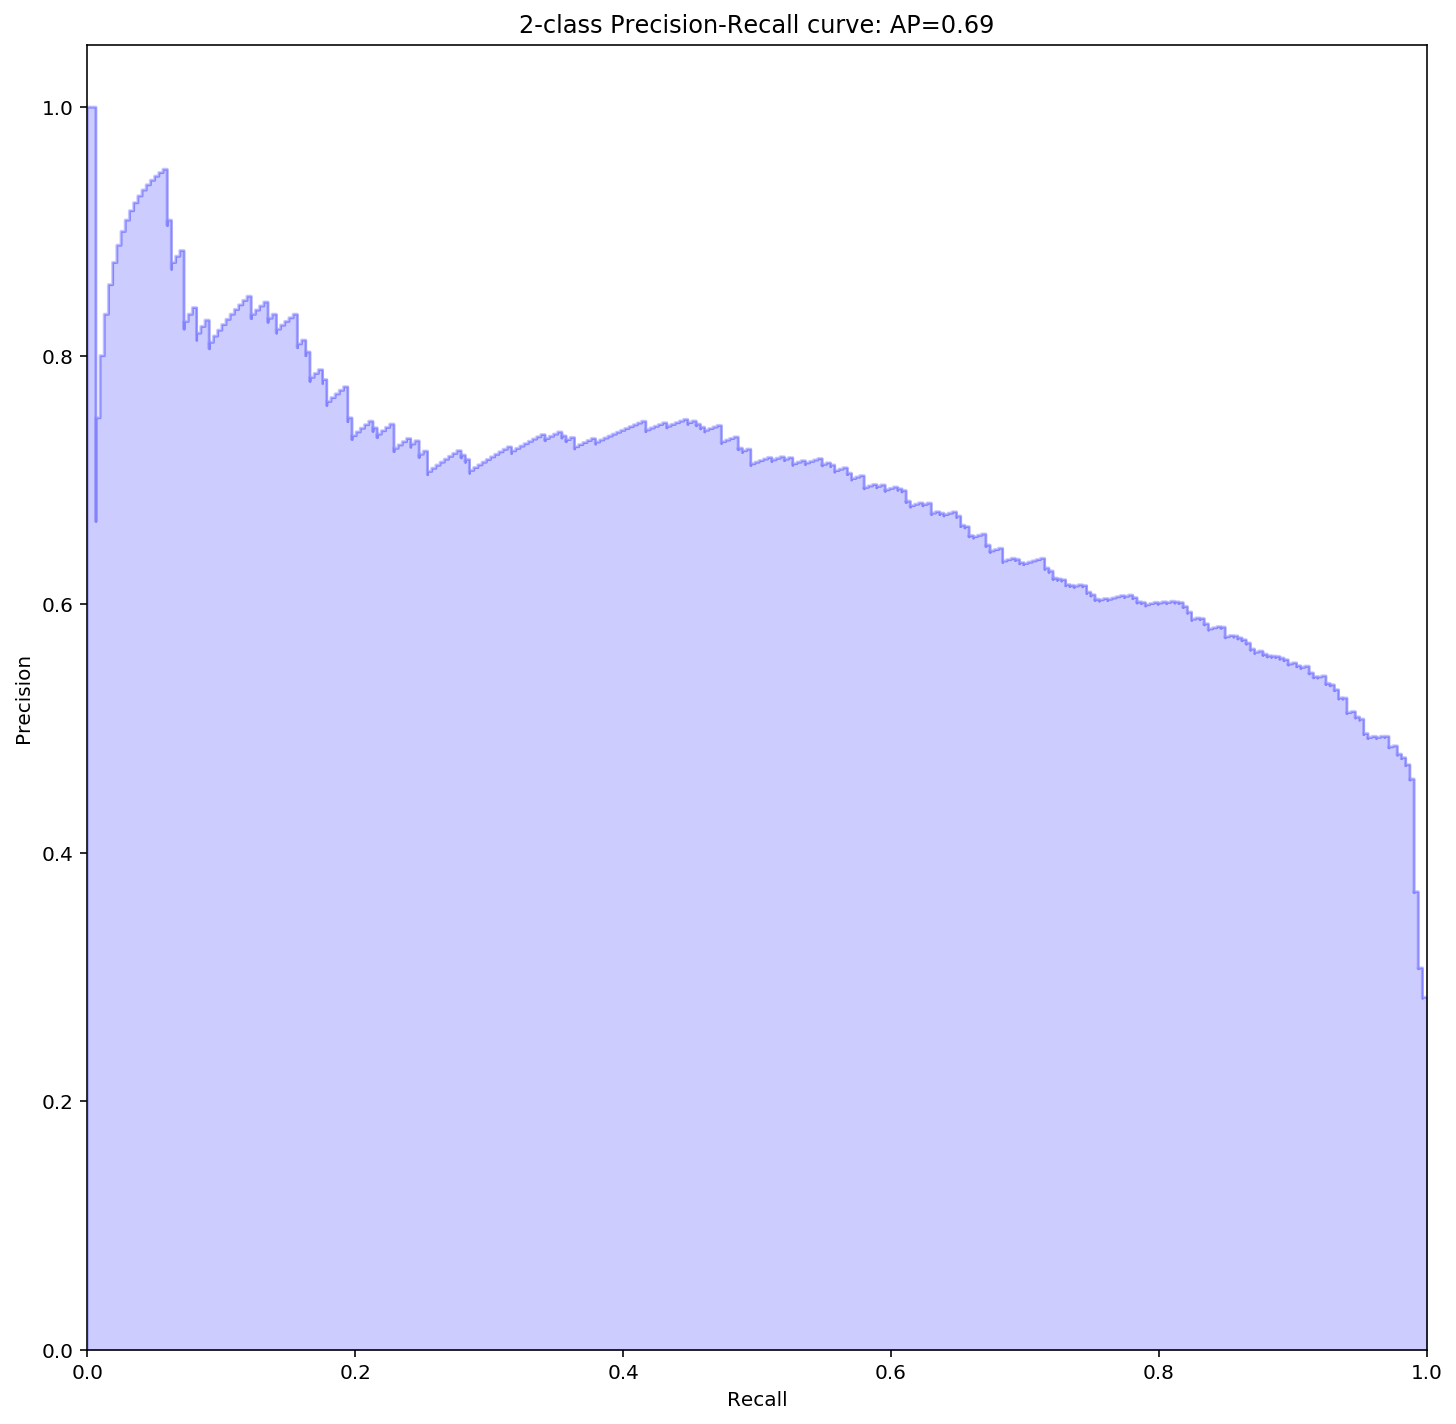

In [86]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred_test)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_test))

Text(0.5,1,'2-class Precision-Recall curve: AP=0.73')

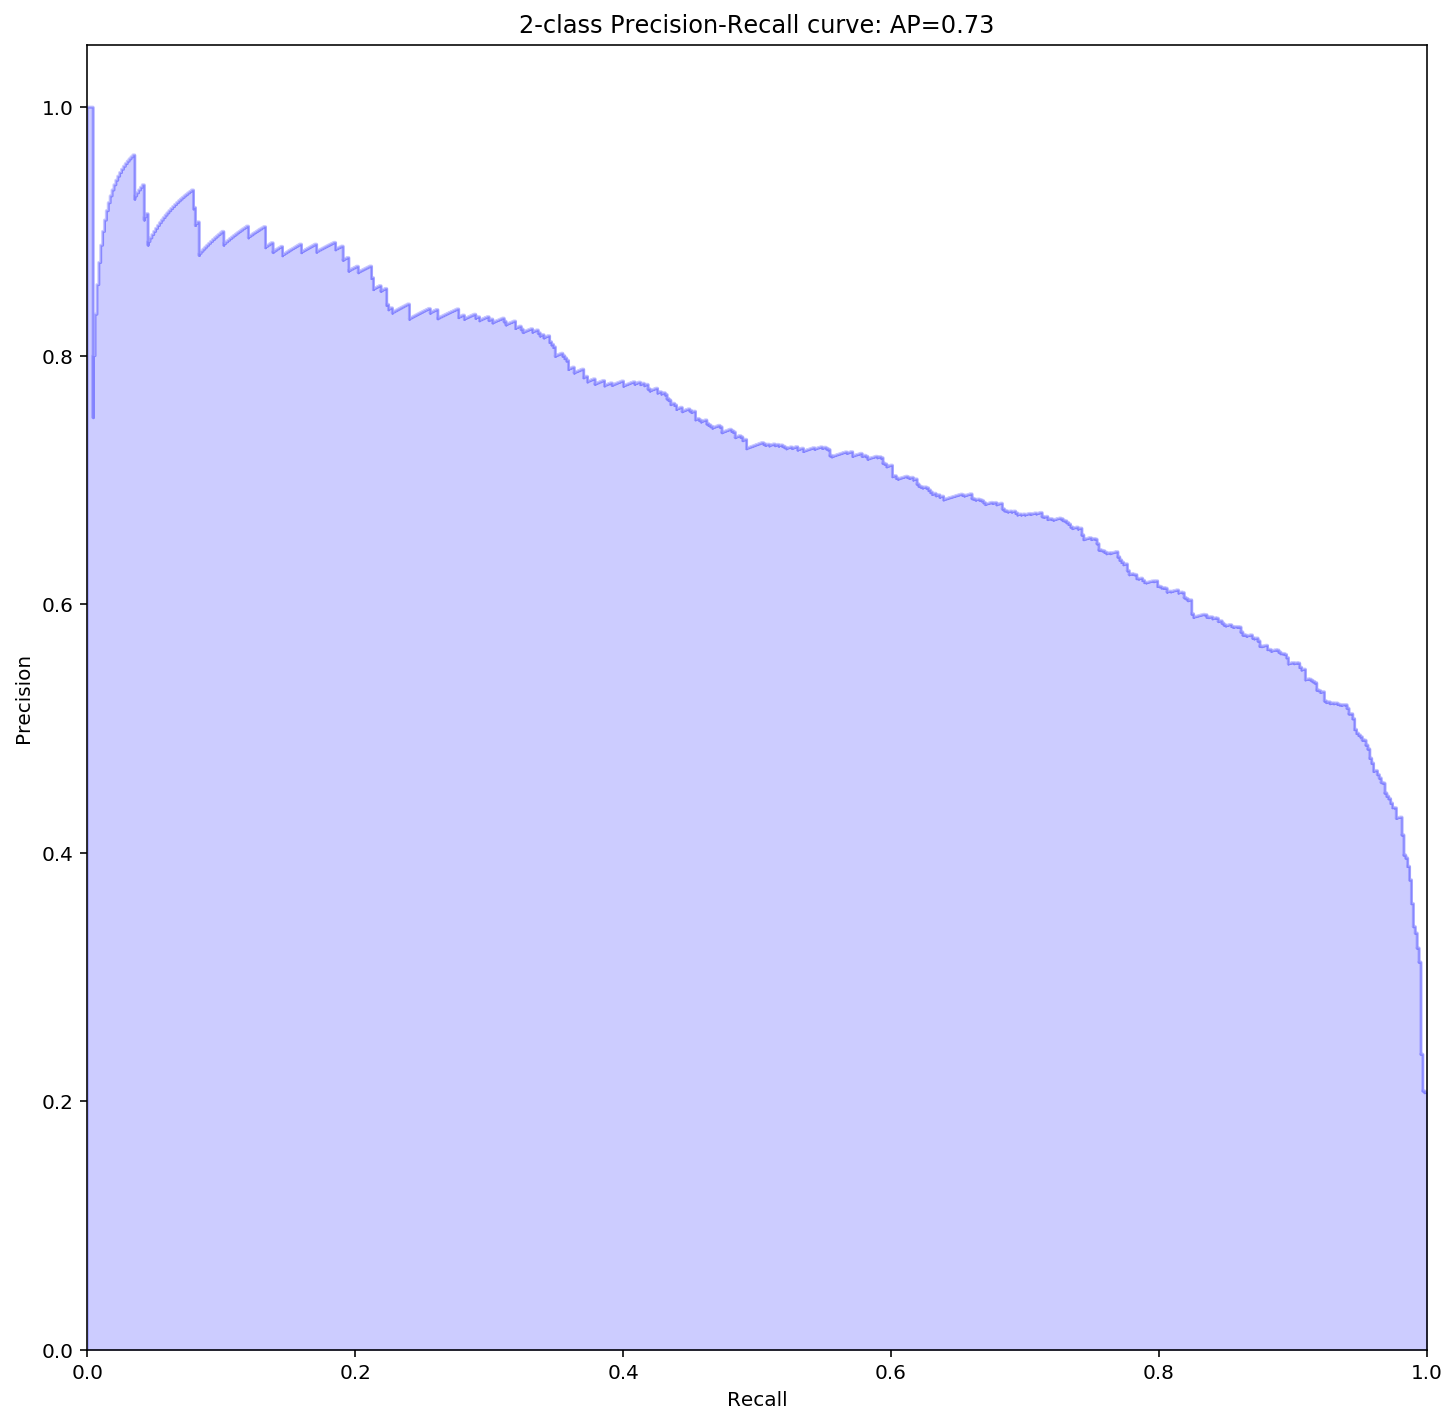

In [37]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_train, y_pred_train)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_train))

In [38]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc(fpr, tpr)

0.9454994647908861

In [39]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
auc(fpr, tpr)

0.9540693203781423

As Curvas são semelhantes e acima de 0.5, então talvez regressão logistica possa ser um bom modelo de classificação sem overfitting.

In [87]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf= KNeighborsClassifier())
pipeline.steps

[('clf',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform'))]

In [88]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [96]:
cv_grid = GridSearchCV(pipeline, param_grid = {
    'clf__leaf_size' : [1,10,20,30],
    'clf__n_neighbors' : [1,5,10,15,20],
    'clf__weights':['uniform', 'distance'],
    'clf__algorithm':['auto', 'ball_tree','kd_tree','brute']
})
                       

cv_grid.fit(X_train[features], y_train)

/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__leaf_size': [1, 10, 20, 30], 'clf__n_neighbors': [1, 5, 10, 15, 20], 'clf__weights': ['uniform', 'distance'], 'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [94]:
cv_grid.best_params_


{'clf__algorithm': 'auto',
 'clf__leaf_size': 1,
 'clf__n_neighbors': 15,
 'clf__weights': 'uniform'}

In [91]:
cv_grid.best_estimator_


Pipeline(memory=None,
     steps=[('clf', KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform'))])

In [92]:
cv_grid.best_score_


0.9055295220243674

Os parametros que tiveram o melhor score (cv score) segundo o GridSearch são 1 de leaf size e 15 neighbors.

In [97]:
y_pred_test = cv_grid.predict_proba(X_test[features])
y_pred_train = cv_grid.predict_proba(X_train[features])

y_pred_test = y_pred_test[:, 1]
y_pred_train = y_pred_train[:, 1]

from sklearn.metrics import average_precision_score
average_precision_test = average_precision_score(y_test, y_pred_test)
average_precision_train = average_precision_score(y_train, y_pred_train)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_test))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_train))

Average precision-recall score: 0.65
Average precision-recall score: 0.73


Text(0.5,1,'2-class Precision-Recall curve: AP=0.65')

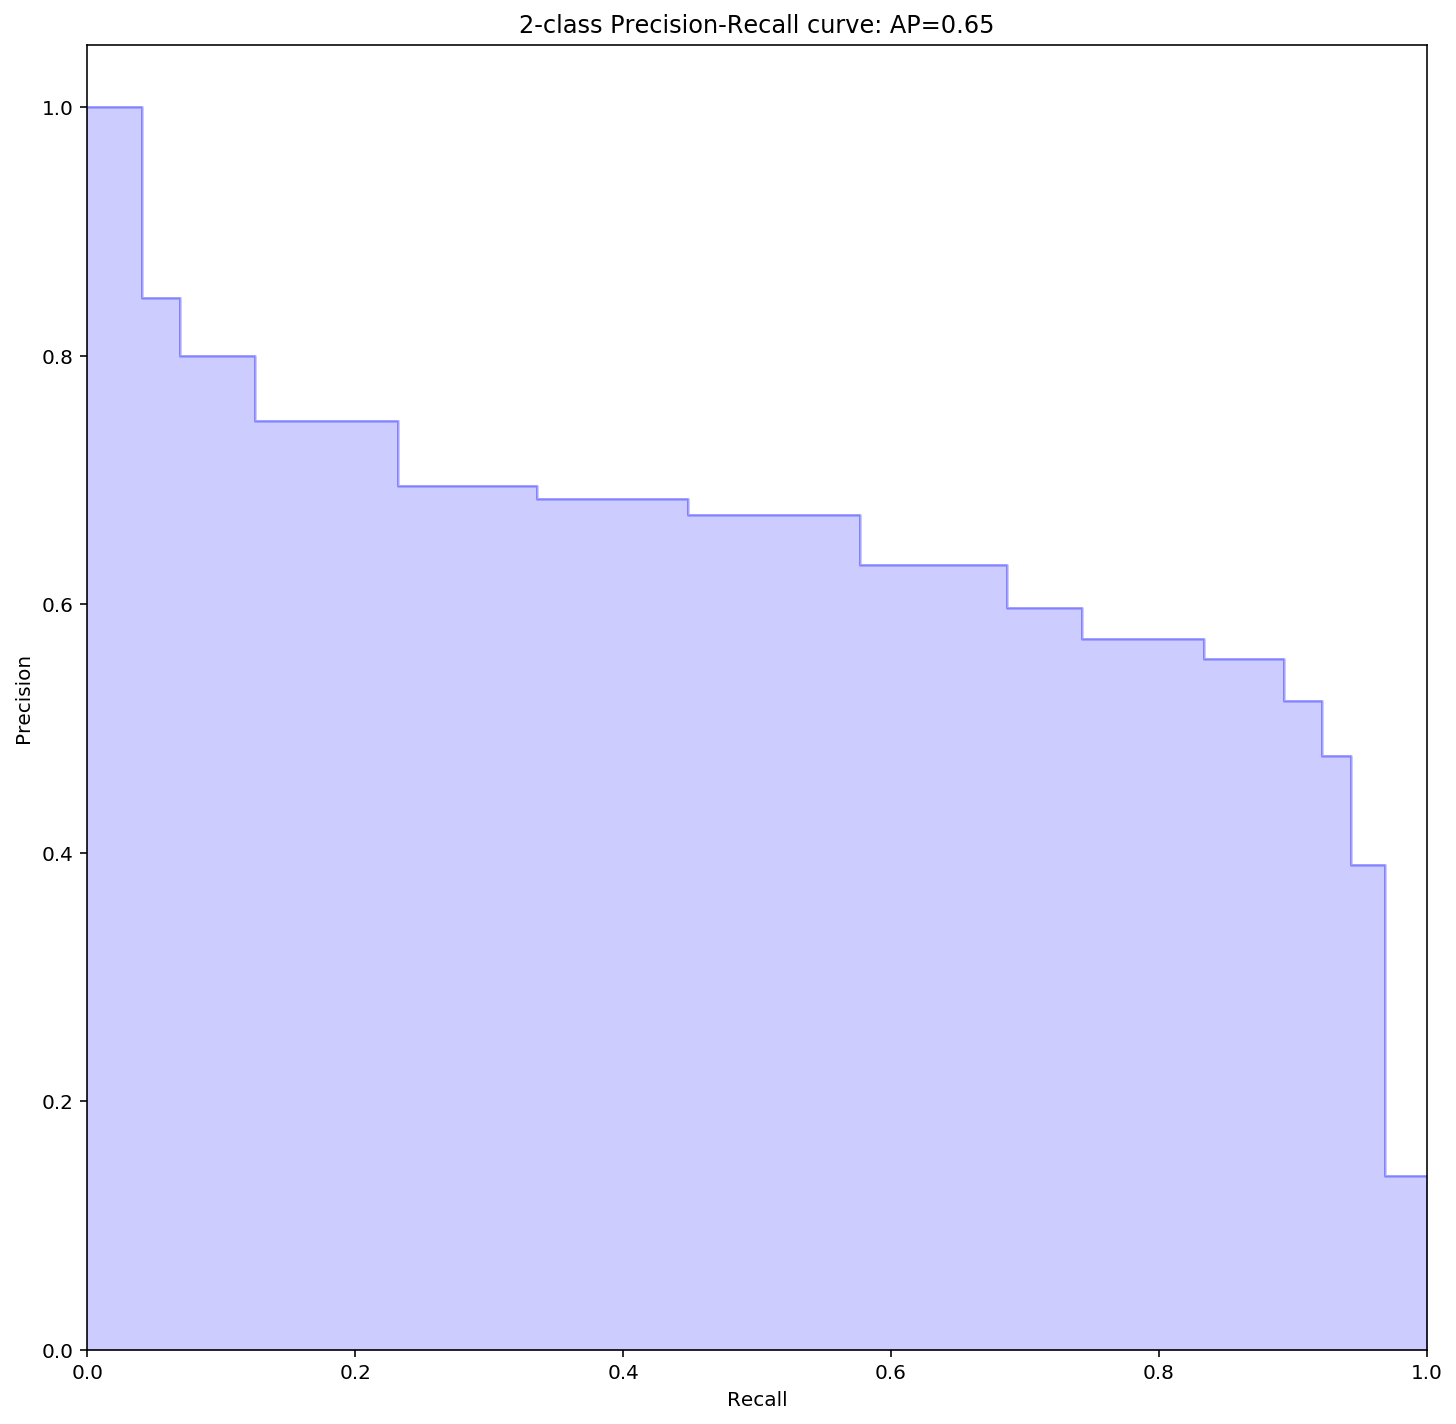

In [98]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred_test)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_test))

Text(0.5,1,'2-class Precision-Recall curve: AP=0.73')

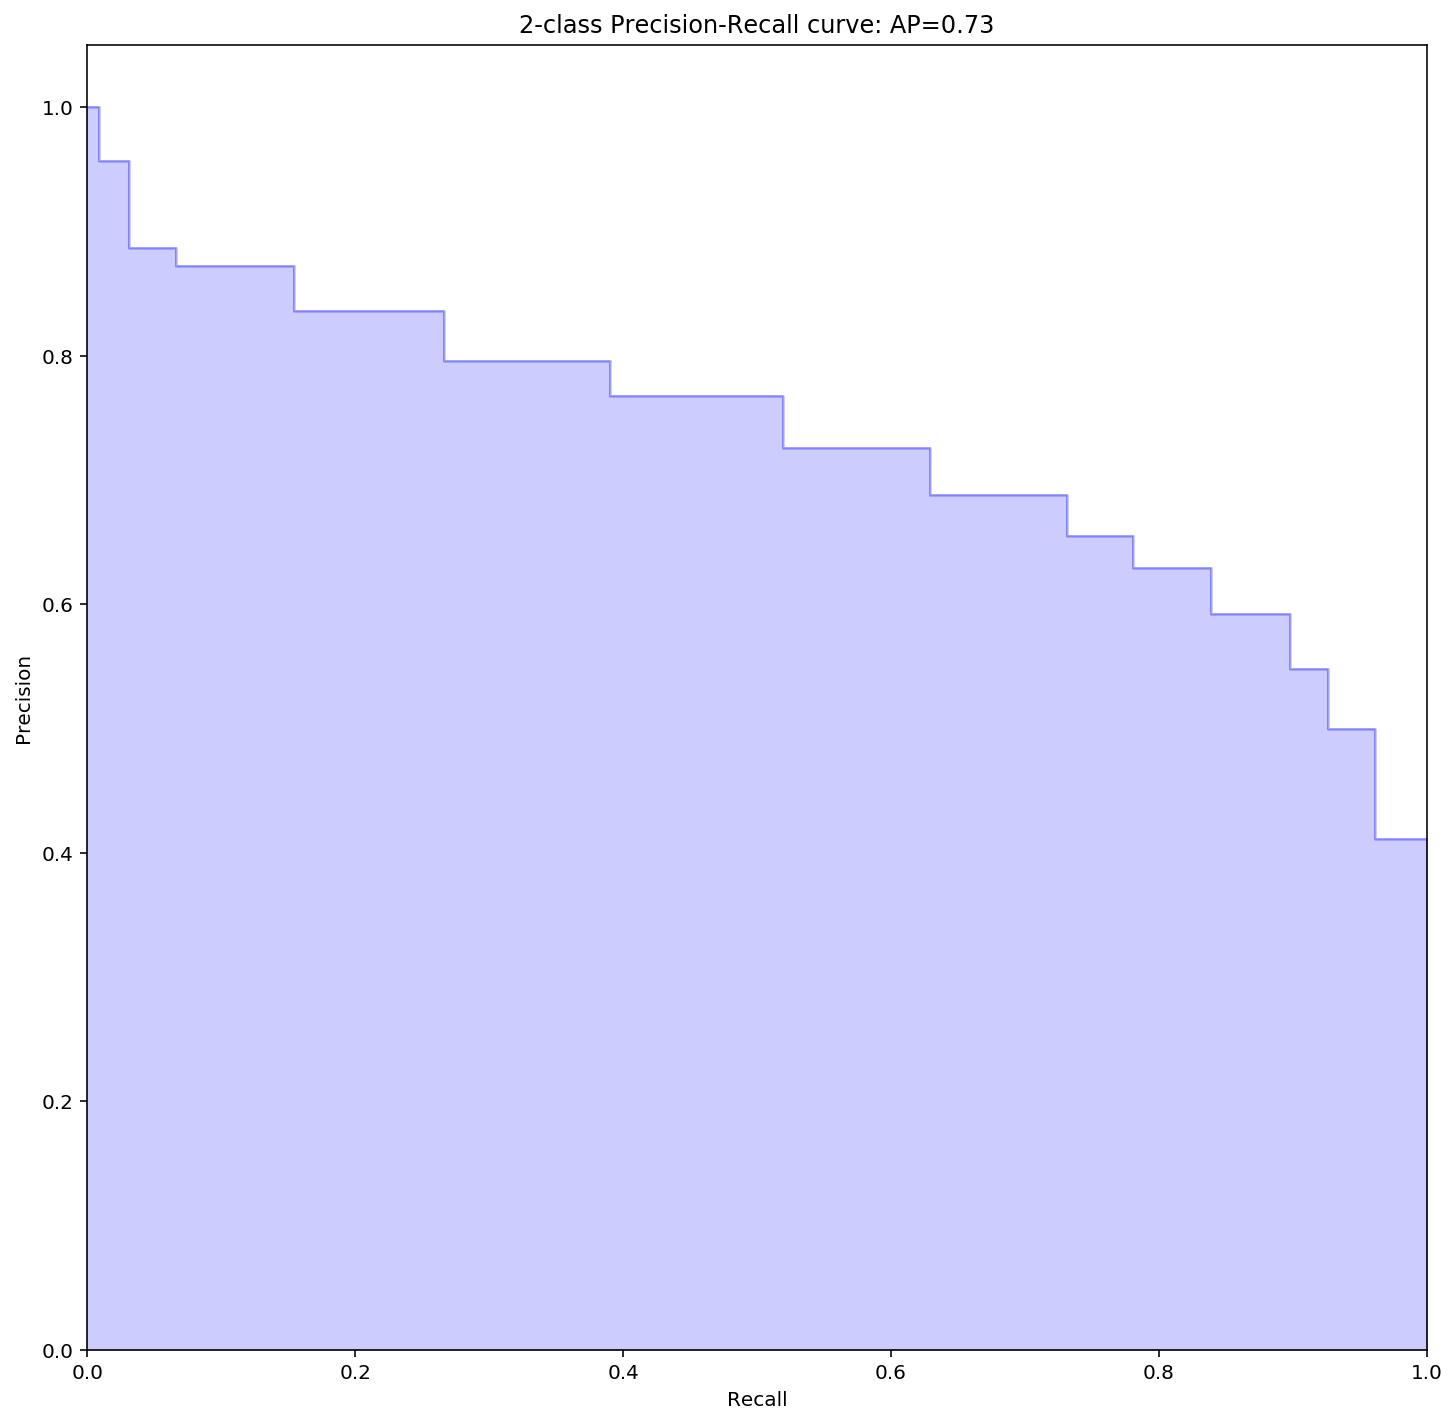

In [99]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_train, y_pred_train)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_train))

In [100]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc(fpr, tpr)

0.9320467607105539

In [101]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
auc(fpr, tpr)

0.9608474460237727

As Curvas são semelhantes entre si e acima de 0.5. Um pouco piores do que as da regressão logistíca.

In [102]:
from sklearn.model_selection import GridSearchCV
cl = DecisionTreeClassifier()
pipeline.set_params(clf = cl)
pipeline.steps

[('clf',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'))]

In [103]:
DecisionTreeClassifier().get_params()


{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [104]:
cv_grid = GridSearchCV(pipeline, param_grid = {
    'clf__max_features' : ['sqrt', 'log2'],
    'clf__min_samples_split' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'clf__min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
    'clf__max_depth':[5,10,20,None]
})
                       

cv_grid.fit(X_train[features], y_train)

/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__max_features': ['auto', 'sqrt', 'log2'], 'clf__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'clf__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'clf__max_depth': [5, 10, 20, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [105]:
cv_grid.best_params_




{'clf__max_depth': 5,
 'clf__max_features': 'sqrt',
 'clf__min_samples_leaf': 9,
 'clf__min_samples_split': 8}

In [106]:
cv_grid.best_estimator_


Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [107]:
cv_grid.best_score_


0.9128397375820057

Os parametros que tiveram o melhor score segundo o GridSearch são 5 de profundidade, sqrt(features), 9 de tamanho de sample em cada folha e  8 para split.

In [111]:
y_pred_test = cv_grid.predict_proba(X_test[features])
y_pred_train = cv_grid.predict_proba(X_train[features])

y_pred_test = y_pred_test[:, 1]
y_pred_train = y_pred_train[:, 1]

from sklearn.metrics import average_precision_score
average_precision_test = average_precision_score(y_test, y_pred_test)
average_precision_train = average_precision_score(y_train, y_pred_train)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_test))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_train))

Average precision-recall score: 0.63
Average precision-recall score: 0.73


Text(0.5,1,'2-class Precision-Recall curve: AP=0.63')

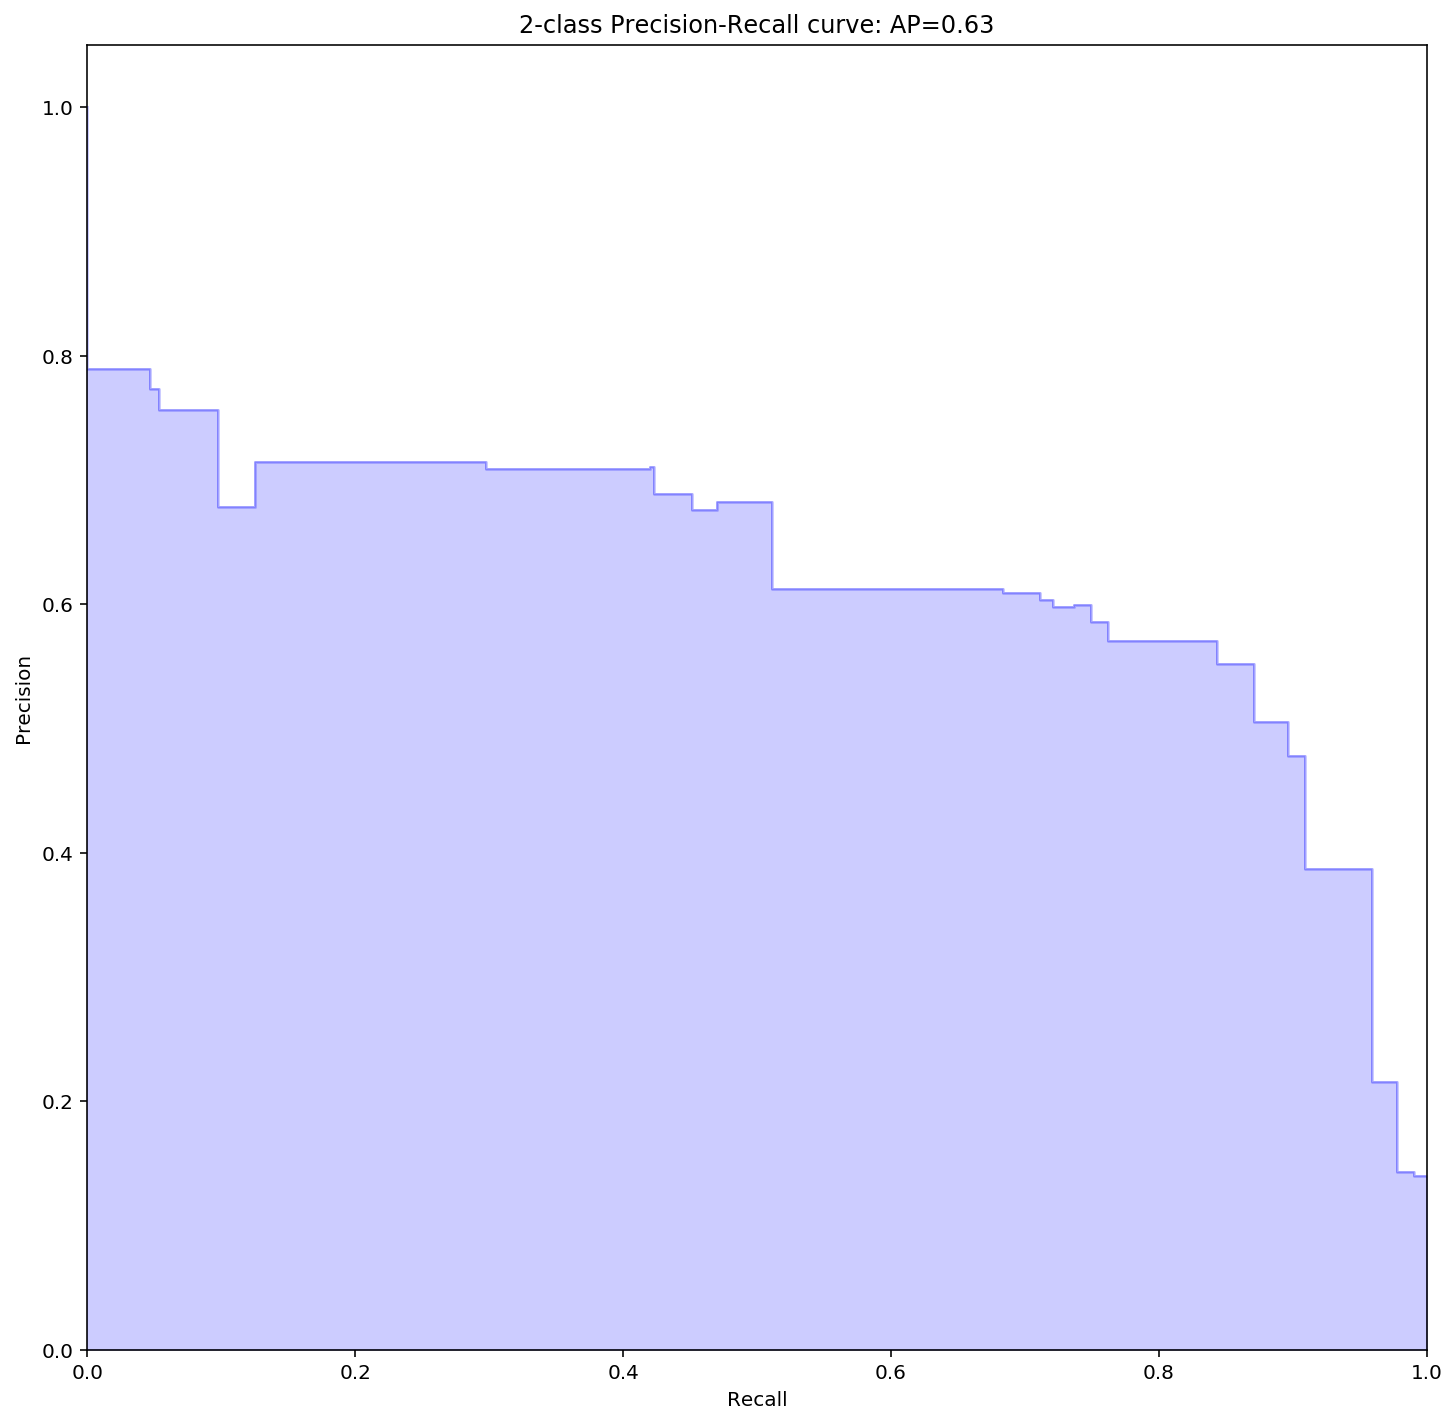

In [112]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred_test)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_test))

Text(0.5,1,'2-class Precision-Recall curve: AP=0.73')

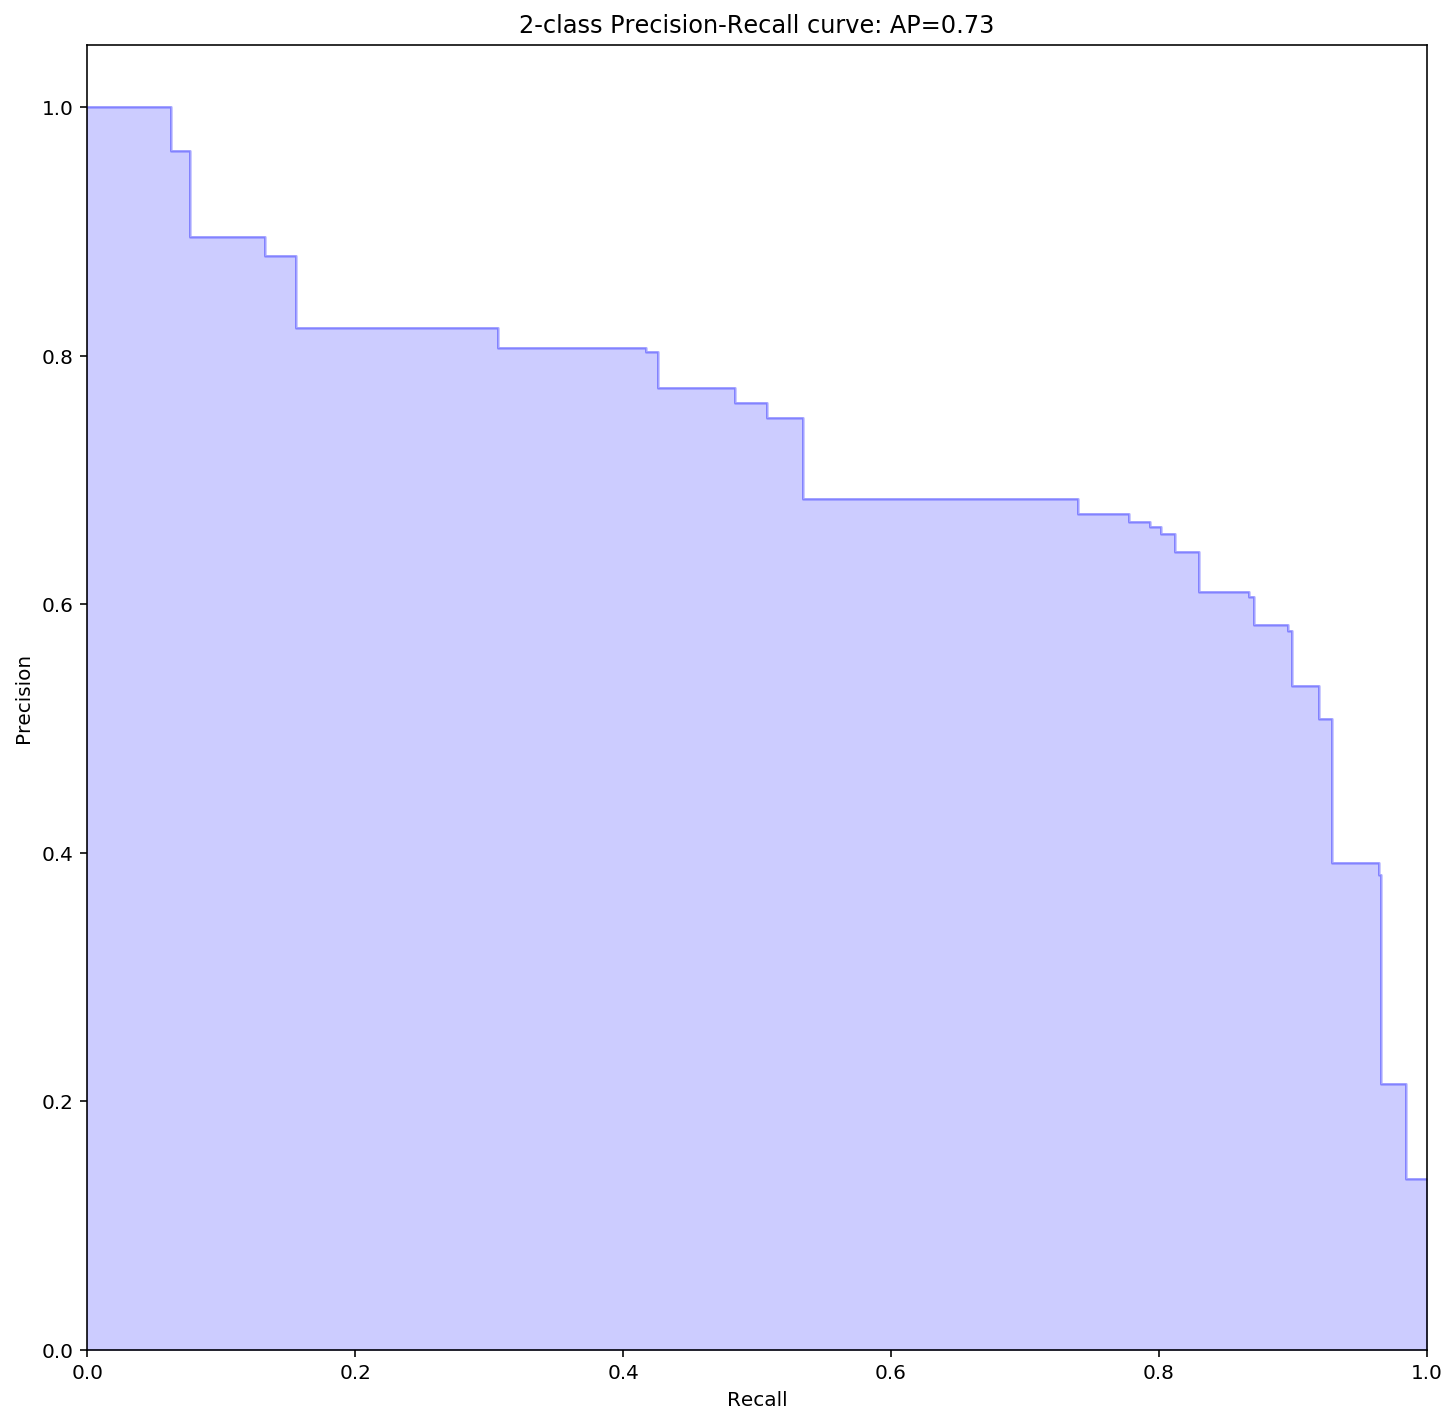

In [113]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_train, y_pred_train)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_train))

In [114]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc(fpr, tpr)

0.9226352040166168

In [115]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
auc(fpr, tpr)

0.9462091335074982

Aqui ja vemos uma maior diferença entre treino e validacao, talvez um overfitting.

In [116]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [117]:
base = DecisionTreeClassifier(max_features = "auto", min_samples_leaf=9, min_samples_split=10)

In [118]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf= AdaBoostClassifier(base_estimator = base))
pipeline.steps

[('clf', AdaBoostClassifier(algorithm='SAMME.R',
            base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=9, min_samples_split=10,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'),
            learning_rate=1.0, n_estimators=50, random_state=None))]

In [119]:
cv_grid = GridSearchCV(pipeline, param_grid = {
    'clf__algorithm' : ['SAMME.R', 'SAMME']
})
                       

cv_grid.fit(X_train[features], y_train)

/home/lucascavalcante/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_s...e,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__algorithm': ['SAMME.R', 'SAMME']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [120]:
cv_grid.best_params_


{'clf__algorithm': 'SAMME.R'}

In [121]:
cv_grid.best_estimator_


Pipeline(memory=None,
     steps=[('clf', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None))])

In [122]:
cv_grid.best_score_


0.9062792877225867

In [123]:
y_pred_test = cv_grid.predict_proba(X_test[features])
y_pred_train = cv_grid.predict_proba(X_train[features])

y_pred_test = y_pred_test[:, 1]
y_pred_train = y_pred_train[:, 1]

from sklearn.metrics import average_precision_score
average_precision_test = average_precision_score(y_test, y_pred_test)
average_precision_train = average_precision_score(y_train, y_pred_train)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_test))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_train))

Average precision-recall score: 0.65
Average precision-recall score: 1.00


Text(0.5,1,'2-class Precision-Recall curve: AP=0.65')

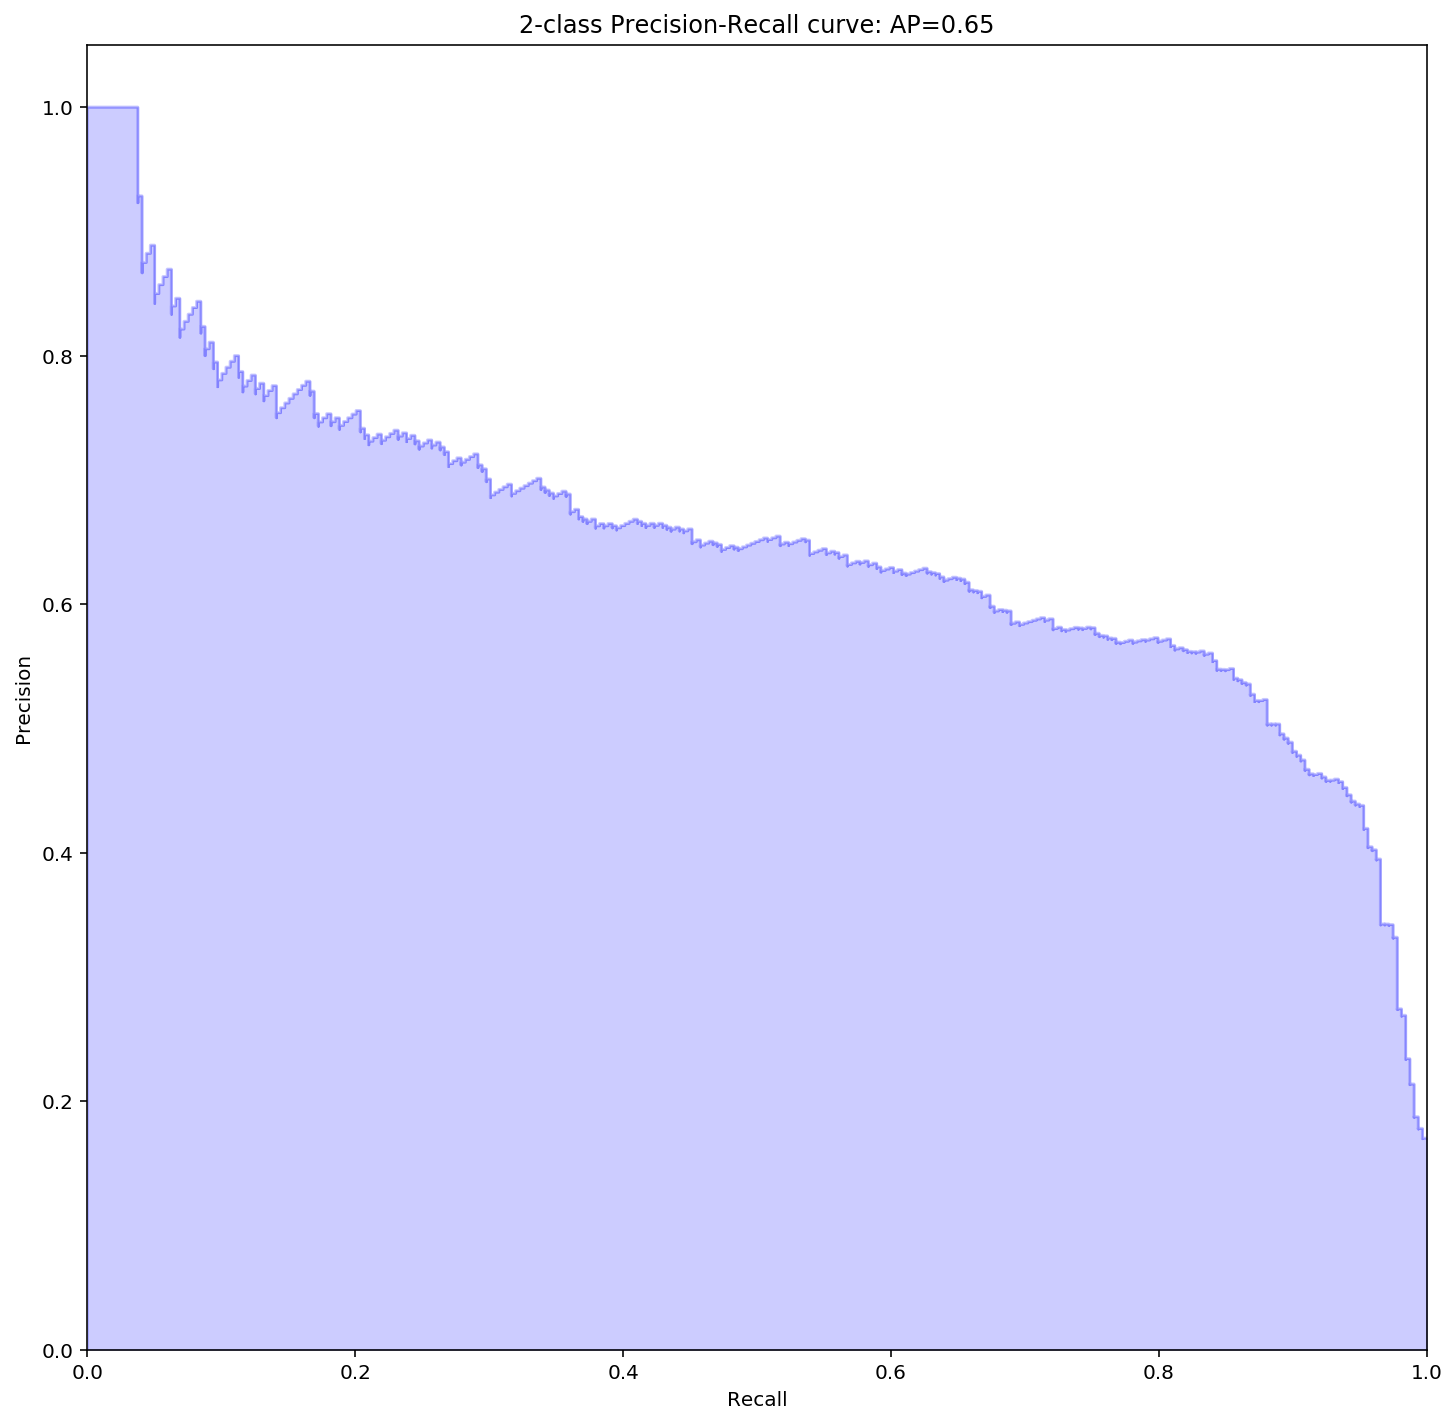

In [124]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred_test)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_test))

Text(0.5,1,'2-class Precision-Recall curve: AP=1.00')

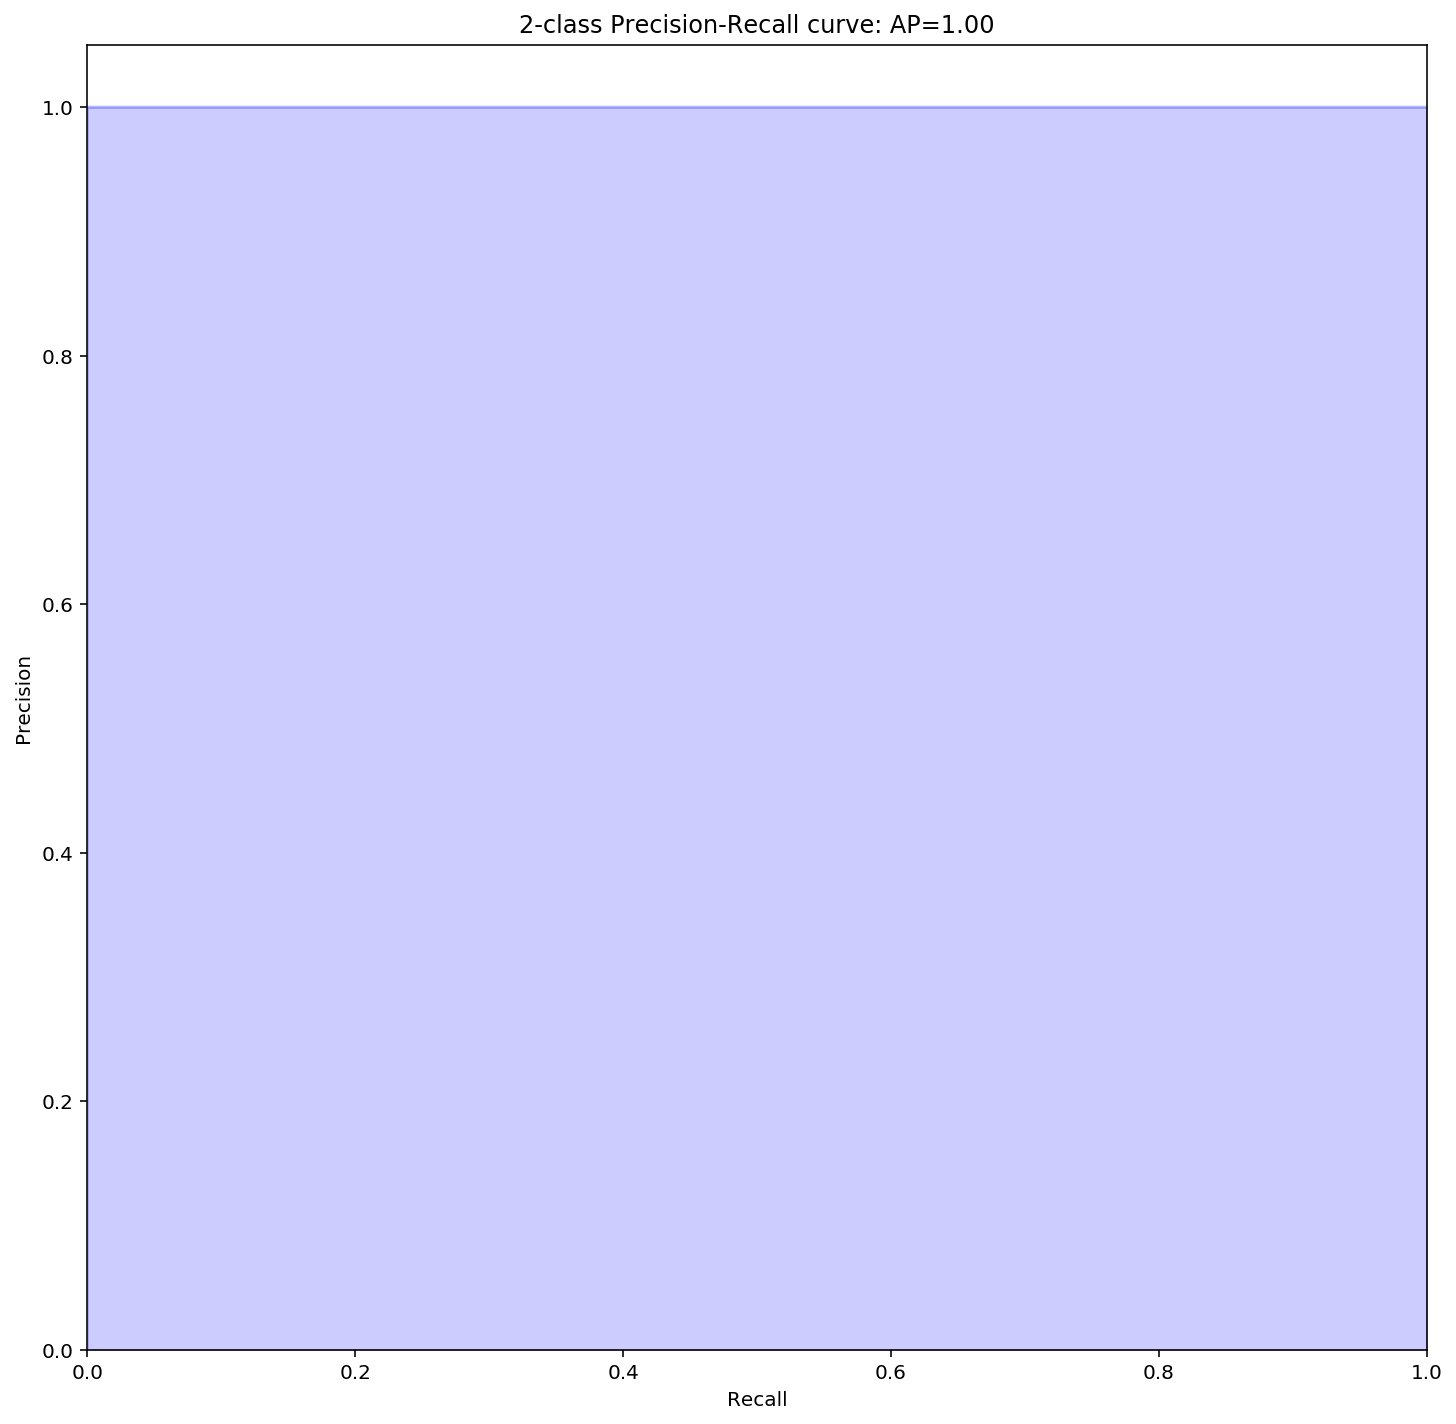

In [125]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_train, y_pred_train)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_train))

In [75]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc(fpr, tpr)

0.9468183729642938

In [76]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
auc(fpr, tpr)

1.0

Já aqui vemos um total indicio de overfitting por parte do AdaBoost